In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [4]:
x = [20, 27, 21, 37,46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]

In [7]:
grafico = px.scatter(x=x , y = y)
grafico.show()

In [8]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                         [53,950],[55,2200],[47,2100],[52,3000],[32,5900],
                         [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2200],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [9]:
scaller_salario = StandardScaler()
base_salario = scaller_salario.fit_transform(base_salario)

In [10]:
base_salario

array([[-1.87963884, -1.12484912],
       [-1.23255006, -1.02759991],
       [-1.78719758, -0.20098169],
       [-0.30813751, -0.71154   ],
       [ 0.52383377, -1.17347372],
       [ 1.17092255, -1.14916142],
       [ 1.35580506, -0.5413539 ],
       [ 0.61627503, -0.5899785 ],
       [ 1.0784813 , -0.15235708],
       [-0.77034379,  1.25775636],
       [-0.12325501,  0.38251353],
       [ 0.0616275 ,  0.86875955],
       [-0.12325501,  1.79262698],
       [ 0.70871628,  0.82013495],
       [ 0.70871628,  1.54950397]])

In [10]:
grafico  = px.scatter(x=base_salario[:, 0], y= base_salario[:, 1])
grafico.show()

In [11]:
import matplotlib. pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage

Text(0, 0.5, 'Distância')

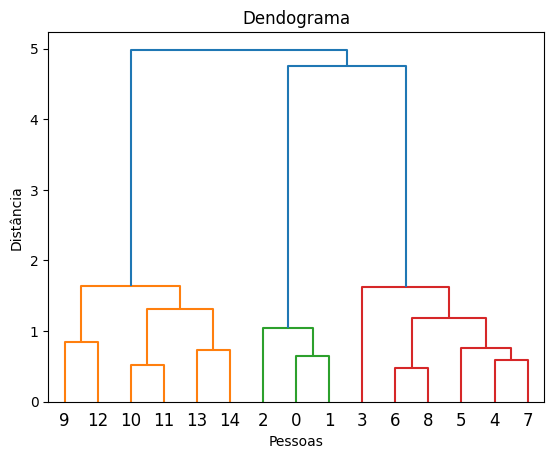

In [14]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância')

In [17]:
from sklearn.cluster import AgglomerativeClustering


In [21]:


hc_salario = AgglomerativeClustering(n_clusters=3, linkage= 'ward', metric='euclidean')
rotulos = hc_salario.fit_predict(base_salario)

In [22]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
grafico = px.scatter(x = base_salario[:, 0], y = base_salario[:, 1], color=rotulos)
grafico.show()

### base Cartao de credito

In [27]:
base_cartao = pd.read_csv('Bases de dados\credit_card_clients.csv', header = 1)
base_cartao


<>:1: SyntaxWarning:

invalid escape sequence '\c'

<>:1: SyntaxWarning:

invalid escape sequence '\c'

C:\Users\diego\AppData\Local\Temp\ipykernel_14708\838984363.py:1: SyntaxWarning:

invalid escape sequence '\c'



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [28]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

base_cartao

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,8393
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,19759
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,115212
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,280625
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,145174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,933714
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,24684
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,73254
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,342915


In [30]:
X_cartao = base_cartao.iloc[:, [1, 25]].values

In [31]:
scaller_cartao = StandardScaler()
X_cartao = scaller_cartao.fit_transform(X_cartao)

In [32]:
X_cartao

array([[-1.13672015, -0.69062566],
       [-0.3659805 , -0.66517959],
       [-0.59720239, -0.45148048],
       ...,
       [-1.05964618, -0.54541558],
       [-0.67427636,  0.05829845],
       [-0.90549825, -0.0811266 ]])

In [34]:
dendrogram = dendrogram(linkage(X_cartao, method='ward'))

KeyboardInterrupt: 

In [ ]:
hc_cartao = AgglomerativeClustering(n_clusters = 3, method = 'euclidean', linkage='ward')
rotulos = hc_cartao.fit_predict(X_cartao)

In [ ]:
grafico = px.scatter(x = base_salario[:, 0], y = base_salario[:, 1], color=rotulos)
grafico.show()

### DB SCAN


In [11]:
from sklearn.cluster import DBSCAN

In [14]:
dbscan = DBSCAN(eps=0.95, min_samples=2)
dbscan.fit(base_salario)

DBSCAN(eps=0.95, min_samples=2)

In [15]:
rotulos = dbscan.labels_
rotulos

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int64)

In [16]:
grafico = px.scatter(x=base_salario[:,0],
                     y = base_salario[:, 1],
                     color=rotulos)
grafico.show()